### Import libraries

In [1]:
# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Date handling
from datetime import datetime

# Display settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


### Load dataset

In [4]:
# Replace with your actual path
df = pd.read_csv("D:/Desktop/GenAI-Powered Analytics Platform/Data/raw/sales_data.csv")

# Basic structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          50000 non-null  object 
 1   order_date        50000 non-null  object 
 2   region            50000 non-null  object 
 3   country           50000 non-null  object 
 4   product_id        50000 non-null  object 
 5   product_category  50000 non-null  object 
 6   quantity          50000 non-null  int64  
 7   unit_price        50000 non-null  float64
 8   discount          50000 non-null  float64
 9   total_amount      50000 non-null  float64
 10  customer_id       50000 non-null  object 
 11  sales_channel     50000 non-null  object 
 12  payment_mode      50000 non-null  object 
 13  order_status      50000 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 5.3+ MB


,order_id,order_date,region,country,product_id,product_category,quantity,unit_price,discount,total_amount,customer_id,sales_channel,payment_mode,order_status
0,ORD-10001,2024-04-12,North,UK,PROD-AO677,Electronics,5,214.90,0.12,940.46,CUST-59825,Online,Credit Card,Completed
1,ORD-10002,2024-12-14,East,India,PROD-LJ380,Sports,1,344.61,0.06,322.23,CUST-53379,Distributor,Credit Card,Cancelled
2,ORD-10003,2024-09-27,South,Brazil,PROD-DD239,Electronics,2,1359.95,0.25,2037.07,CUST-56158,Online,Cash,Cancelled
3,ORD-10004,2024-04-16,South,South Africa,PROD-LM344,Furniture,2,1332.68,0.10,2404.24,CUST-53695,Online,Cash,Completed
4,ORD-10005,2024-03-12,South,Argentina,PROD-GG825,Home & Garden,1,321.03,0.18,261.77,CUST-51921,Retail,Credit Card,Completed


### Data quality checks

In [5]:
# Check missing values
print(df.isnull().sum())

# Check duplicates
print("Duplicate rows:", df.duplicated().sum())

# Summary stats
df.describe(include='all').T


order_id            0
order_date          0
region              0
country             0
product_id          0
product_category    0
quantity            0
unit_price          0
discount            0
total_amount        0
customer_id         0
sales_channel       0
payment_mode        0
order_status        0
dtype: int64
Duplicate rows: 0


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,50000,50000,ORD-59984,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
order_date,50000,365,2024-04-15,173,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,50000,4,North,12558,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,50000,19,USA,5047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_id,50000,48004,PROD-ZB726,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_category,50000,6,Electronics,12494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
quantity,50000.0,NaN,NaN,NaN,5.53638,5.011808,1.0,2.0,4.0,7.0,50.0
unit_price,50000.0,NaN,NaN,NaN,515.602274,502.077784,10.04,131.8775,310.93,751.0475,1999.95
discount,50000.0,NaN,NaN,NaN,0.142531,0.079716,0.0,0.08,0.13,0.19,0.47
total_amount,50000.0,NaN,NaN,NaN,2448.814461,3933.801803,6.83,351.4275,1025.165,2788.555,62486.3


#### Insight:

Identify missing or inconsistent entries.

Verify if discounts or prices have unrealistic values (e.g., negative or >1).

### Data type and date conversion

In [6]:
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['year'] = df['order_date'].dt.year
df['month'] = df['order_date'].dt.month_name()
df['day'] = df['order_date'].dt.day
df['quarter'] = df['order_date'].dt.quarter


## Univariate Analysis

### Order Status Distribution

C:\Users\akasar\AppData\Local\Temp\1\ipykernel_5104\817950473.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='order_status', order=df['order_status'].value_counts().index, palette='coolwarm')


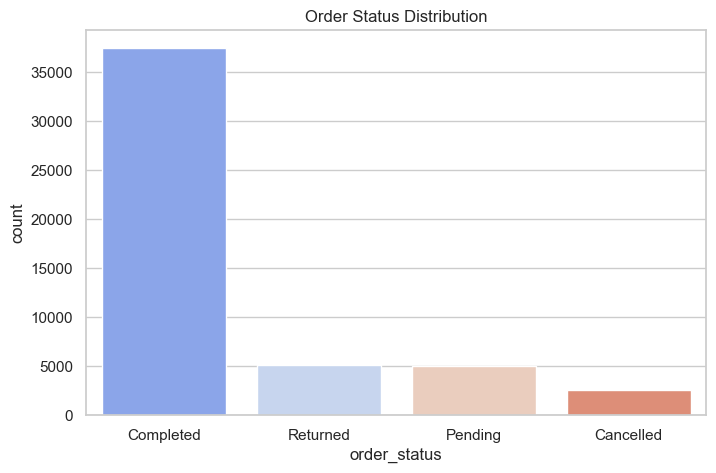

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='order_status', order=df['order_status'].value_counts().index, palette='coolwarm')
plt.title("Order Status Distribution")
plt.show()


### Region & Sales Channel Distribution

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.countplot(data=df, x='region', ax=ax[0], palette='viridis')
sns.countplot(data=df, x='sales_channel', ax=ax[1], palette='Set2')
ax[0].set_title("Sales by Region")
ax[1].set_title("Sales Channel Distribution")
plt.show()


C:\Users\akasar\AppData\Local\Temp\1\ipykernel_5104\4242003997.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='region', ax=ax[0], palette='viridis')
C:\Users\akasar\AppData\Local\Temp\1\ipykernel_5104\4242003997.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sales_channel', ax=ax[1], palette='Set2')


### Product Category Sales Volume

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='product_category', y='quantity', estimator='sum', ci=None, palette='crest')
plt.title("Total Quantity Sold per Product Category")
plt.xticks(rotation=45)
plt.show()


## Bivariate Analysis

### Revenue by Region

In [ ]:
region_sales = df.groupby('region')['total_amount'].sum().sort_values(ascending=False)
region_sales.plot(kind='bar', figsize=(8,5), color='teal')
plt.title("Total Revenue by Region")
plt.ylabel("Revenue")
plt.show()


### Discount vs Revenue Relationship

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='discount', y='total_amount', alpha=0.6)
plt.title("Impact of Discount on Total Amount")
plt.show()


### Payment Mode Preference

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='payment_mode', order=df['payment_mode'].value_counts().index, palette='tab10')
plt.title("Preferred Payment Methods")
plt.show()


## Time Series & Seasonal Trends

### Monthly Sales Trend

In [ ]:
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['total_amount'].sum()
monthly_sales.plot(figsize=(10,5), marker='o')
plt.title("Monthly Sales Trend")
plt.ylabel("Revenue")
plt.xlabel("Month")
plt.show()


### Yearly Growth

In [ ]:
yearly_growth = df.groupby('year')['total_amount'].sum().reset_index()
sns.barplot(data=yearly_growth, x='year', y='total_amount', palette='flare')
plt.title("Yearly Revenue Growth")
plt.show()


### Correlation Analysis

In [ ]:
num_cols = ['quantity', 'unit_price', 'discount', 'total_amount']
plt.figure(figsize=(6,5))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


### Customer Behavior

In [ ]:
customer_spend = df.groupby('customer_id')['total_amount'].sum().sort_values(ascending=False).head(10)
customer_spend.plot(kind='bar', figsize=(8,5), color='coral')
plt.title("Top 10 Customers by Total Spend")
plt.ylabel("Total Spend")
plt.show()


## RFM, Prophet, LSTM, Market-Basket

In [ ]:
# === Install required packages (run once) ===
# In Colab uncomment and run the pip installs. In local env install similarly.
# !pip install prophet        # for Prophet (formerly fbprophet)
# !pip install mlxtend        # for market basket apriori
# !pip install matplotlib seaborn pandas numpy scikit-learn tensorflow

# === Imports ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# For RFM & market-basket
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# For Prophet
from prophet import Prophet

# For LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")


### Load data + basic cleanup

In [ ]:
# Load dataset
df = pd.read_csv("sales_data.csv", parse_dates=['order_date'])  # ensure order_date parsed

# Basic checking
print("Rows, cols:", df.shape)
print(df.dtypes)
df.head()

# Ensure total_amount exists or compute it
if 'total_amount' not in df.columns or df['total_amount'].isnull().any():
    df['total_amount'] = df['quantity'] * df['unit_price'] * (1 - df['discount'])

# Clean: remove rows without order_id or order_date
df = df.dropna(subset=['order_id', 'order_date'])


### RFM (Recency, Frequency, Monetary)

In [ ]:
# Reference date for recency (use max order_date + 1 day to avoid zero)
reference_date = df['order_date'].max() + pd.Timedelta(days=1)
print("Reference date for recency:", reference_date.date())

# Aggregate RFM
rfm = df.groupby('customer_id').agg({
    'order_date': lambda x: (reference_date - x.max()).days,  # Recency
    'order_id': 'nunique',                                   # Frequency (unique orders)
    'total_amount': 'sum'                                    # Monetary
}).reset_index()

rfm.columns = ['customer_id', 'Recency', 'Frequency', 'Monetary']

# Inspect
rfm.describe().T


### Score customers (1-5) and create an RFM segment

In [ ]:
# Score 1-5 (5 best) — uses quintiles
rfm['R_score'] = pd.qcut(rfm['Recency'], 5, labels=[5,4,3,2,1]).astype(int)   # lower recency => higher score
rfm['F_score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)
rfm['M_score'] = pd.qcut(rfm['Monetary'], 5, labels=[1,2,3,4,5]).astype(int)

rfm['RFM_score_str'] = rfm['R_score'].astype(str) + rfm['F_score'].astype(str) + rfm['M_score'].astype(str)
rfm['RFM_score'] = rfm[['R_score','F_score','M_score']].sum(axis=1)

# Quick top customers
top_customers = rfm.sort_values('Monetary', ascending=False).head(10)
top_customers[['customer_id','Recency','Frequency','Monetary','RFM_score_str','RFM_score']]


### Map to segments (simple rule-based)

In [ ]:
def rfm_segment_label(row):
    if row['RFM_score'] >= 13:
        return 'Champions'
    if row['RFM_score'] >= 10:
        return 'Loyal'
    if row['RFM_score'] >= 7:
        return 'Potential'
    if row['RFM_score'] >= 5:
        return 'At Risk'
    return 'Lost'

rfm['segment'] = rfm.apply(rfm_segment_label, axis=1)
rfm.segment.value_counts().plot(kind='bar', figsize=(8,4), title='RFM Segment Counts')
plt.show()

# Export segments for downstream action
rfm.to_csv("rfm_segments.csv", index=False)
